# Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import time
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Loading Images from folder

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [7]:
earthquake=load_images_from_folder("/content/drive/My Drive/Disaster/Dataset/Earthquake")
flood=load_images_from_folder("/content/drive/My Drive/Disaster/Dataset/Flood")
other=load_images_from_folder("/content/drive/My Drive/Disaster/Dataset/Other")

In [ ]:
earthquake=np.array(earthquake)
flood=np.array(flood)
other=np.array(other)

In [ ]:
data=np.concatenate((earthquake,flood,other),axis=0)
len(data)

1051

# Setting the output classes

In [ ]:
y=np.zeros(len(data))
y[len(earthquake):(len(earthquake)+len(flood))]=1
y[(len(earthquake)+len(flood)):(len(earthquake)+len(flood)+len(other))]=2
len(y)

1051

# Normalising data

In [ ]:
data = data.astype('float32')
data/=255

# Categorizing the output

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y= np_utils.to_categorical(y)

# Splitting to train,test with balanced classes

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_idx, test_idx in stratSplit.split(data, y):
    X_train=data[train_idx]
    Y_train=y[train_idx]
    X_test=data[test_idx]
    Y_test=y[test_idx]

In [ ]:
np.array(X_train).shape

(788, 224, 224, 3)

# Initialising VGG

In [ ]:
import keras
import tensorflow.keras
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# Create the base model of VGG19
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = ((224,224,3)))

80142336/80134624 [==============================] - 1s 0us/step


# Transfer Learning with layer unfreezing

In [ ]:
output = vgg19.layers[-1].output
output = tensorflow.keras.layers.Flatten()(output)
vgg_model = Model(vgg19.input, output)


input_shape = vgg_model.output_shape[1]
model = Sequential()
model.add(vgg_model)
model.add(Dense(64, activation="relu"))
model.add(Dense(2, activation='softmax'))

flag=False
model.trainable = True
for layer in vgg_model.layers:
    if layer.name=='block5_conv1':
        flag=True
    layer.trainable = flag
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fc92cbde438>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc8fa6885c0>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc8fa6888d0>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc8fa688cc0>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc8f9e51908>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc8f41324a8>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc8f4132828>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc8f413c3c8>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc8f413cf98>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc8f4142668>,block3_conv3,False


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_3 (Functional)    (None, 25088)             20024384  
_________________________________________________________________
dense (Dense)                (None, 64)                1605696   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 21,630,210
Trainable params: 11,045,058
Non-trainable params: 10,585,152
_________________________________________________________________
None


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])             


In [ ]:
for layer in model.layers:
    print(layer.output_shape)

(None, 25088)
(None, 512)
(None, 3)


In [ ]:
model.fit(X_train,Y_train, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
18/18 [==============================] - 585s 33s/step - loss: 0.9064 - accuracy: 0.6007 - val_loss: 0.7945 - val_accuracy: 0.6751
Epoch 2/10
18/18 [==============================] - 590s 33s/step - loss: 0.4831 - accuracy: 0.8385 - val_loss: 0.6020 - val_accuracy: 0.7300
Epoch 3/10
18/18 [==============================] - 594s 33s/step - loss: 0.2743 - accuracy: 0.9274 - val_loss: 0.5515 - val_accuracy: 0.7595
Epoch 4/10
18/18 [==============================] - 588s 33s/step - loss: 0.1902 - accuracy: 0.9546 - val_loss: 0.4253 - val_accuracy: 0.8312
Epoch 5/10
18/18 [==============================] - 585s 32s/step - loss: 0.1003 - accuracy: 0.9819 - val_loss: 0.4612 - val_accuracy: 0.8186
Epoch 6/10
18/18 [==============================] - 581s 32s/step - loss: 0.0666 - accuracy: 0.9964 - val_loss: 0.5788 - val_accuracy: 0.7722
Epoch 7/10
18/18 [==============================] - 584s 32s/step - loss: 0.0362 - accuracy: 0.9964 - val_loss: 0.4413 - val_accuracy: 0.8523
Epoch 

In [ ]:
X_train.shape

(788, 224, 224, 3)

Model Test

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

Y_pred=model.predict_proba(X_test)
original= np.argmax(Y_test, axis=1)
result = np.argmax(Y_pred, axis=1)
acc=accuracy_score(original, result)
print(acc)
print(confusion_matrix(original, result))
print(classification_report(original, result))

0.8631178707224335
[[80  2  5]
 [ 9 70  9]
 [ 5  6 77]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        87
           1       0.90      0.80      0.84        88
           2       0.85      0.88      0.86        88

    accuracy                           0.86       263
   macro avg       0.86      0.86      0.86       263
weighted avg       0.86      0.86      0.86       263



In [ ]:
model.save('/content/drive/My Drive/Disaster/Models/Unfrozen_from_block5conv1.h5')

# Transfer Learning with all frozen

In [ ]:
train_features = vgg19.predict(np.array(X_train), batch_size=256, verbose=1)
test_features = vgg19.predict(np.array(X_test), batch_size=256, verbose=1)

2/2 [==============================] - 5s 2s/step


In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
print(train_features.shape)
print(X_train.shape)

(788, 7, 7, 512)
(788, 224, 224, 3)


In [ ]:
# Add Dense and Dropout layers on top of VGG19 pre-trained
model = models.Sequential()
model.add(Flatten())
model.add(Dense(512, activation="softmax"))
model.add(Dense(3, activation="softmax"))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(train_features,Y_train, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
18/18 [==============================] - 2s 106ms/step - loss: 1.0683 - accuracy: 0.5771 - val_loss: 1.0236 - val_accuracy: 0.8101
Epoch 2/10
18/18 [==============================] - 2s 87ms/step - loss: 1.0097 - accuracy: 0.8475 - val_loss: 1.0057 - val_accuracy: 0.7975
Epoch 3/10
18/18 [==============================] - 2s 103ms/step - loss: 0.9746 - accuracy: 0.9074 - val_loss: 0.9944 - val_accuracy: 0.7932
Epoch 4/10
18/18 [==============================] - 2s 87ms/step - loss: 0.9418 - accuracy: 0.9510 - val_loss: 0.9658 - val_accuracy: 0.8228
Epoch 5/10
18/18 [==============================] - 2s 84ms/step - loss: 0.9171 - accuracy: 0.9492 - val_loss: 0.9468 - val_accuracy: 0.8101
Epoch 6/10
18/18 [==============================] - 2s 83ms/step - loss: 0.8855 - accuracy: 0.9691 - val_loss: 0.9317 - val_accuracy: 0.8186
Epoch 7/10
18/18 [==============================] - 2s 84ms/step - loss: 0.8574 - accuracy: 0.9800 - val_loss: 0.9262 - val_accuracy: 0.8143
Epoch 8/10


Result

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

Y_pred=model.predict_proba(test_features)
original= np.argmax(Y_test, axis=1)
#Y_pred=model.predict_proba(X_test)
result = np.argmax(Y_pred, axis=1)
acc=accuracy_score(original, result)
print(acc)
print(confusion_matrix(original, result))
print(classification_report(original, result))

0.8555133079847909
[[81  0  6]
 [ 9 66 13]
 [ 4  6 78]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90        87
           1       0.92      0.75      0.83        88
           2       0.80      0.89      0.84        88

    accuracy                           0.86       263
   macro avg       0.86      0.86      0.85       263
weighted avg       0.86      0.86      0.85       263



In [ ]:
model.save('/content/drive/My Drive/Disaster/Models/Frozen_all.h5')

# Model Load

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import CustomObjectScope
from tensorflow.keras.initializers import glorot_uniform
with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        model = load_model('/content/drive/My Drive/Disaster/Models/Unfrozen_from_block5conv1.h5')

# Image Load

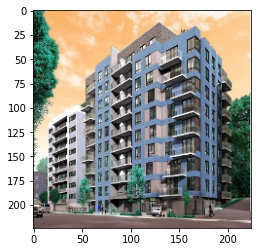

In [ ]:
img1=cv2.imread('/content/drive/My Drive/Disaster/Test/test_image_3.jpg',cv2.IMREAD_COLOR);
img1 = cv2.resize(img1, (224, 224))
plt.imshow(img1)
img1 = img1.astype('float32')
img1/=255

In [ ]:
img1=np.asarray(img1)
img1=np.expand_dims(img1, axis=0)

For fully frozen model

In [ ]:
pred = vgg19.predict(img1, batch_size=32, verbose=1)
classification=model.predict(pred)

For other models

In [ ]:
classification=model.predict(img1)

Result

In [ ]:
classification=np.argmax(classification, axis=1)
classification

array([2])